## Assignment 1: Hello Graph World

---
### DATA 620
### Jeremy O'Brien

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Some practice...

Name: Practice Graph
Type: Graph
Number of nodes: 7
Number of edges: 3
Average degree:   0.8571


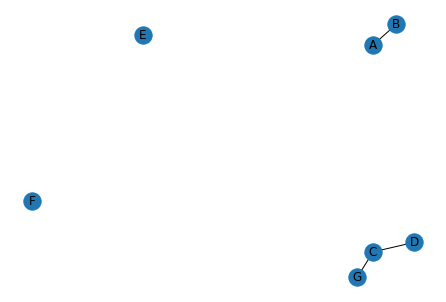

In [12]:
# Practice networkx setup on graph
G1 = nx.Graph(name='Practice Graph')
G1.add_nodes_from(['A','B','C','D','E','F','G'])
G1.add_edges_from([('A','B'), ('C','D'), ('C','G')])
print(nx.info(G1))
nx.draw(G1, with_labels=True)

### Assignment Exercise

Creating a directed graph for computational advertising structural equation model based on https://www.inference.vc/causal-inference-3-counterfactuals/ and http://jmlr.org/papers/volume14/bottou13a/bottou13a.pdf.  
<br><br>Here's what the graph looks like in the source material:

<img src='ComputationalAdvertising_StructuralEquationModel.png'>

In [13]:
# Pass CSV identifying edges to dataframe
url = 'https://raw.githubusercontent.com/JeremyOBrien16/CUNY_DATA_620/master/HelloGraphWorld.csv'
adplace_edges = pd.read_csv(url, error_bad_lines=False)
print(adplace_edges)

            from       to
0    user_intent    query
1    user_intent   clicks
2          query   scores
3          query      ads
4          query     bids
5         scores    slate
6         scores   prices
7            ads   scores
8            ads   prices
9           bids    slate
10          bids   prices
11         slate   clicks
12        prices  revenue
13        clicks  revenue
14  ad_inventory      ads
15  ad_inventory     bids


In [14]:
# Create dictionary of equation symbols for each node
eq_symbol = {
    'user_intent' : 'u',
    'query' : 'x',
    'scores' : 'q',
    'ads' : 'a',
    'bids' : 'b',
    'clicks' : 'y',
    'revenue' : 'z',
    'prices' : 'c',
    'ad_inventory' : 'v',
    'slate' : 's'
}

# Create list of edges based on CSV-derived dataframe
adplace = nx.from_pandas_edgelist(adplace_edges, 
                                  source='from', 
                                  target='to', 
                                  edge_attr=True, 
                                  create_using=nx.DiGraph())

# Map symbols from dictionary to nodes as attributes
nx.set_node_attributes(adplace, 
                       eq_symbol,
                      'symbol')

# Check the graph before visualizing
print(nx.info(adplace), '\n\nNodes:\n', list(adplace.nodes.data()))

Name: 
Type: DiGraph
Number of nodes: 10
Number of edges: 16
Average in degree:   1.6000
Average out degree:   1.6000 

Nodes:
 [('user_intent', {'symbol': 'u'}), ('query', {'symbol': 'x'}), ('clicks', {'symbol': 'y'}), ('scores', {'symbol': 'q'}), ('ads', {'symbol': 'a'}), ('bids', {'symbol': 'b'}), ('slate', {'symbol': 's'}), ('prices', {'symbol': 'c'}), ('revenue', {'symbol': 'z'}), ('ad_inventory', {'symbol': 'v'})]


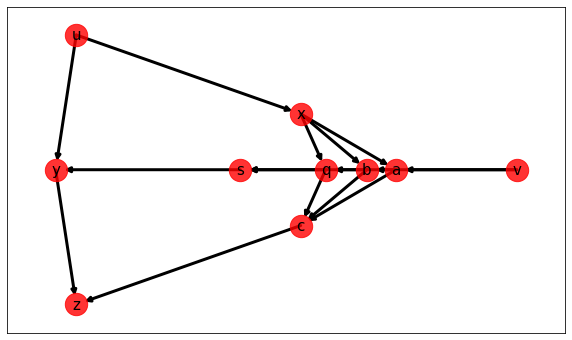

In [15]:
# Size the graph's plot
plt.figure(figsize=(10,6))

# Use spectral layout
layout = nx.spectral_layout(adplace)

# Assign the symbol dict as node attributes
# Single character symbols are used to label the graph in place of node names, for better legibility
node_labels = nx.get_node_attributes(adplace, 'symbol')

# Draw nodes, edges, and labels separately for more control
nx.draw_networkx_nodes(adplace, 
                        pos=layout, 
                        node_size=500, 
                        node_color='red',
                        alpha=.8)
nx.draw_networkx_edges(adplace,
                       pos=layout,
                       width=3,
                       style='dotted',
                       edge_color='black')
nx.draw_networkx_labels(adplace, 
                        pos=layout,
                        labels=node_labels,
                        font_size=15)


# Display the graph
plt.show()